In [267]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
list = []
base_url = 'https://www.vroom.com/catalog/all-years/lexus,porsche,tesla?page='
for page in range(1,9):
    print(base_url+str(page))
    headers={'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36'} 
    r = requests.get(base_url+str(page),headers = headers)
    c = r.content
    soup = BeautifulSoup(c, 'html.parser')
    all = soup.find_all('div',{'class':'Vehicle__Information-sc-13p5roa-7 kJuOJn'})
    
    for item in all:
        d={}
        d['model'] = item.find('span',{'class':'Vehicle__YearMakeModel-sc-13p5roa-8 dPBJmp'}).text
        d['price'] = item.find('span',{'class':'Vehicle__Price-sc-13p5roa-13 dmmfBB'}).text
        d['miles'] = item.find('span',{'class':'Vehicle__Miles-sc-13p5roa-12 dYxXkn'}).text
        d['trim'] = item.find('span',{'class':'Vehicle__Trim-sc-13p5roa-10 gpPisT'}).text
        list.append(d)

https://www.vroom.com/catalog/all-years/lexus,porsche,tesla?page=1
https://www.vroom.com/catalog/all-years/lexus,porsche,tesla?page=2
https://www.vroom.com/catalog/all-years/lexus,porsche,tesla?page=3
https://www.vroom.com/catalog/all-years/lexus,porsche,tesla?page=4
https://www.vroom.com/catalog/all-years/lexus,porsche,tesla?page=5
https://www.vroom.com/catalog/all-years/lexus,porsche,tesla?page=6
https://www.vroom.com/catalog/all-years/lexus,porsche,tesla?page=7
https://www.vroom.com/catalog/all-years/lexus,porsche,tesla?page=8


In [222]:
df = pd.DataFrame(list)
df.head()

,model,price,miles,trim
0,2019 Lexus LC 500,"$71,980",534 miles,Base
1,2015 Lexus ES 350,"$19,980","49,978 miles",Base
2,2015 Lexus CT 200h,"$17,980","48,245 miles",Base
3,2019 Lexus RX 450h,"$39,980","29,869 miles",450h
4,2020 Tesla Model 3,"$38,980","9,599 miles",Standard Range Plus


In [224]:
dfsplit = df['model'].str.split(' ',expand=True)
dfsplit.head()

,0,1,2,3
0,2019,Lexus,LC,500
1,2015,Lexus,ES,350
2,2015,Lexus,CT,200h
3,2019,Lexus,RX,450h
4,2020,Tesla,Model,3


In [244]:
final = df.join(dfsplit,how='outer')

In [245]:
final.drop([2,3],axis=1,inplace=True)

In [246]:
final.columns=['model','price','miles','trim','year','make']

In [247]:
final = final[['year','model','make','price','miles','trim']]
final.head()

,year,model,make,price,miles,trim
0,2019,2019 Lexus LC 500,Lexus,"$71,980",534 miles,Base
1,2015,2015 Lexus ES 350,Lexus,"$19,980","49,978 miles",Base
2,2015,2015 Lexus CT 200h,Lexus,"$17,980","48,245 miles",Base
3,2019,2019 Lexus RX 450h,Lexus,"$39,980","29,869 miles",450h
4,2020,2020 Tesla Model 3,Tesla,"$38,980","9,599 miles",Standard Range Plus


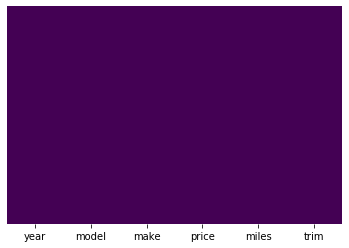

In [248]:
sns.heatmap(final.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [253]:
final['price'] = final['price'].apply(lambda X:X.replace('$','').replace(',',''))
final['miles'] = final['miles'].apply(lambda X:X.replace('miles','').replace(',',''))

In [259]:
final['price'] = pd.to_numeric(final['price'])
final['miles'] = pd.to_numeric(final['miles'])

Text(0.5, 1, 'Average Prices over Year by Brand')

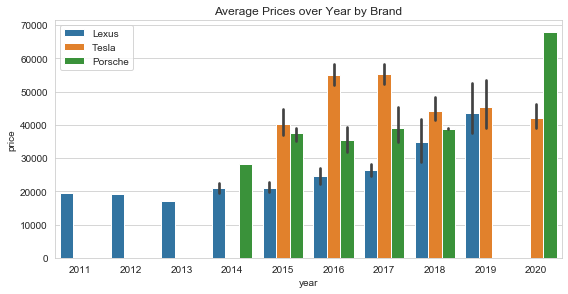

In [333]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.barplot('year','price',hue='make',data=final)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title('Average Prices over Year by Brand')

Text(0.5, 1.0, 'Car Breakdown by Model')

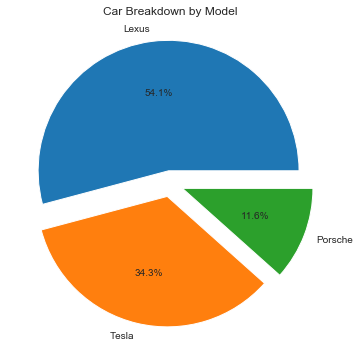

In [357]:
plt.figure(figsize=(12,6))
plt.pie(final['make'].value_counts(),autopct='%1.1f%%',labels=final['make'].unique(),explode=(.1,.1,.1))
plt.title('Car Breakdown by Model')